In [1]:
!ls

Lab5_Regression.pdf   Sun.xlsx              pairdata.png
Lab_1_part.ipynb      TS_Forecasting.ipynb  ssa_an.pdf
Lab_2_part.ipynb      consumption_train.csv ssa_for.pdf
SSA.py                iterate.dat           test


In [2]:
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
import scipy as sc

%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
sns.set(rc={"figure.figsize": (10, 6)})
sns.set_style('darkgrid')

In [4]:
ts = pd.read_csv('consumption_train.csv', sep='\t', decimal=',', parse_dates={'Timestamp': pd.to_datetime(['Dates'],'dd.mm.yy hh:mm')}, index_col = 'Timestamp')
print len(ts)
ts.head(10)

26280


,EnergyCons,Dev,WeekDay
Timestamp,,,
2005-01-01 00:00:00,1290,-11,6
2005-01-01 01:00:00,1266,-12,6
2005-01-01 02:00:00,1273,-13,6
2005-01-01 03:00:00,1280,-14,6
2005-01-01 04:00:00,1293,-15,6
2005-01-01 05:00:00,1263,-16,6
2005-01-01 06:00:00,1279,-16,6
2005-01-01 07:00:00,1304,-16,6
2005-01-01 08:00:00,1330,-16,6


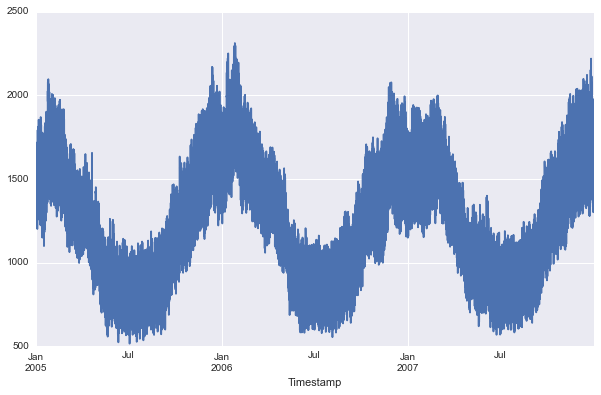

In [5]:
ts['EnergyCons'].plot()

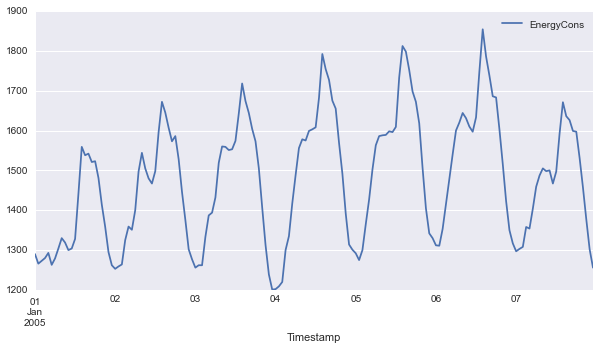

In [6]:
ts.ix['2005-01-01 00:00:00':'2005-01-07 23:00:00', range(1)].plot(figsize(10,5))

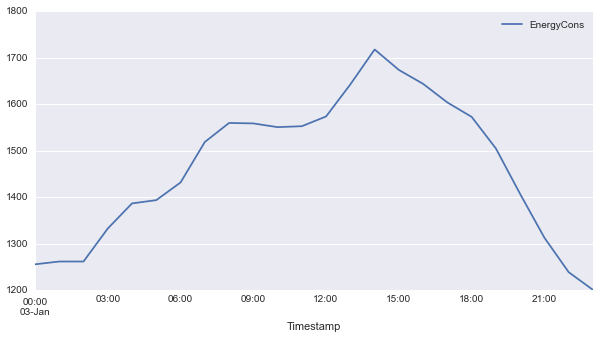

In [7]:
ts.ix['2005-01-03 00:00:00':'2005-01-03 23:00:00', [0]].plot(figsize(10,5))

# Quality functions

### Mean absolute percantage error (MAPE)


$$MAPE(p,y) = mean(\frac{|p-y|}{|y|})$$

### Coefficient of determination

$$R^2 = 1 - \frac{\color{blue}{SS_\text{res}}}{\color{red}{SS_\text{tot}}}$$


In [59]:
x = train[-168:]
x = x.reshape(1,168)
x = x[0]
x

array([ 649,  637,  620,  670,  723,  798,  869,  887,  910,  920,  954,
        923,  915,  906,  930,  920,  951, 1013, 1056, 1030,  911,  794,
        701,  654,  646,  672,  683,  839,  963, 1116, 1199, 1225, 1227,
       1220, 1229, 1245, 1209, 1175, 1137, 1130, 1086, 1116, 1146, 1126,
        975,  838,  776,  726,  748,  756,  771,  881, 1023, 1128, 1240,
       1254, 1272, 1259, 1314, 1336, 1346, 1290, 1271, 1251, 1219, 1213,
       1225, 1147,  990,  874,  785,  770,  747,  762,  776,  910, 1069,
       1174, 1266, 1287, 1270, 1251, 1243, 1232, 1188, 1121, 1098, 1081,
       1056, 1039, 1149, 1157, 1002,  862,  760,  732,  705,  728,  746,
        885, 1024, 1140, 1209, 1210, 1212, 1167, 1198, 1182, 1147, 1106,
       1089, 1122, 1116, 1133, 1209, 1159,  984,  846,  772,  735,  747,
        750,  760,  888, 1025, 1146, 1248, 1251, 1249, 1217, 1225, 1184,
       1149, 1081, 1076, 1059, 1008,  989, 1036, 1099, 1000,  859,  772,
        738,  738,  713,  699,  766,  816,  937, 10

In [61]:
y = y_pred
y.reshape(1,168)[0]

array([ 748,  735,  727,  768,  807,  874,  972, 1028, 1069, 1067, 1090,
       1093, 1067, 1074, 1055, 1058, 1014, 1065, 1122, 1118,  986,  866,
        802,  732,  724,  719,  771,  900, 1007, 1135, 1226, 1263, 1282,
       1255, 1301, 1274, 1277, 1260, 1196, 1151, 1132, 1133, 1195, 1163,
       1022,  871,  818,  766,  779,  781,  799,  887, 1049, 1144, 1237,
       1275, 1284, 1235, 1224, 1190, 1171, 1121, 1118, 1078, 1085, 1084,
       1151, 1151,  990,  827,  750,  729,  718,  709,  725,  872, 1005,
       1092, 1169, 1159, 1158, 1113, 1126, 1139, 1134, 1107, 1080, 1057,
       1073, 1063, 1154, 1092,  922,  789,  720,  687,  695,  700,  736,
        848, 1004, 1081, 1175, 1199, 1228, 1216, 1222, 1212, 1212, 1166,
       1131, 1127, 1076, 1078, 1156, 1148, 1013,  894,  813,  784,  760,
        746,  751,  903, 1040, 1085, 1182, 1203, 1205, 1150, 1173, 1161,
       1153, 1108, 1084, 1064, 1041, 1064, 1122, 1131,  997,  847,  768,
        735,  741,  734,  730,  793,  859,  934, 10

In [71]:
def qualitySSE(x,y):
    # Sum squared error
    # x - real values
    # y - forecasts
    return np.sum((x-y)**2), (x-y)**2

def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x - real values
    # y - forecasts
    x = x.reshape(1, len(x))[0]
    y = y.reshape(1, len(y))[0]
    x = x[x != 0]
    y = y[x!=0]
    qlt = (np.abs(x-y)/(x*1.0))
    return mean(qlt)*100 , np.abs(x-y)

def qualityR2(x,y):
    # R2 statistics
    # x - real values
    # y - forecasts
    x = x.reshape(1, len(x))[0]
    y = y.reshape(1, len(y))[0]
    mean_y = np.mean(y)
    return 1-qualitySSE(x,y)[0]/qualitySSE(x,[mean_y]*len(x))[0]

In [37]:
train, test = ts.ix[:int(len(ts)*0.8), [0]].values, ts.ix[int(len(ts)*0.8):, [0]].values
print len(train), len(test)

21024 5256


### [2] Moving prediction

In [38]:
def mov_prediction(data, offset):
    return data[-2*offset:-offset]

In [30]:
type(train[-168:]), type(y_pred)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [39]:
# Оценим качество:
def quality_control(y_real, y_pred):
    mape_res = qualityMAPE(y_real, y_pred)
    r_sq = qualityR2(y_real, y_pred)
    print "MAPE:", mape_res[0]
    print "R^2:", r_sq

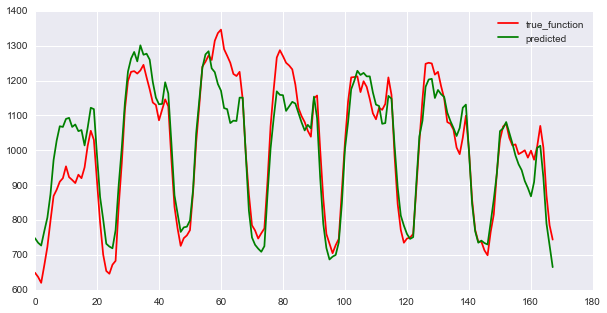

MAPE: 5.71036602882
R^2: 0.864659136769


In [72]:
# Train
y_pred = mov_prediction(train, 168)
plt.plot(train[-168:], "r-", label = "true_function")
plt.plot(y_pred, "g-", label = "predicted")
plt.legend()
plt.show()
quality_control(train[-168:], y_pred)

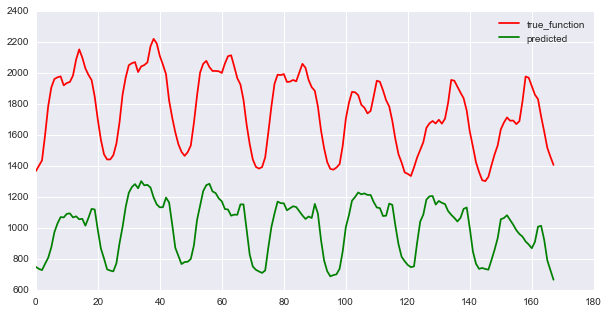

MAPE: 42.8555479673
R^2: 0.061491717134


In [73]:
# Test
plt.plot(test[-168:], "r-", label = "true_function")
plt.plot(y_pred, "g-", label = "predicted")
plt.legend()
plt.show()
quality_control(test[-168:], y_pred)

# Autoregression

In [ ]:
# K -- окно истории
# h -- delay

def get_autoregrmatrix(x,h,K):
    L = len(x)
    X = sc.linalg.hankel(x[:L-h-K+1], x[-K:])
    y = x[K+h-1:]
    return X,y

### [3.1] Mape(K) dependency.

In [ ]:
K=168
h = 1 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

In [ ]:
len(x_train)